# Application of Machine Learning Methods to Analysis of Cyber-Sport Events
## Dmitry Savostyanov, 131

## Витрина данных по участникам Kiev Major

## Финальный файл скрипта: StatsForMajor.csv

В данном скрипте представлена таблица по командам, которые указаны в файле Dota Features & Snippets - Roles.csv за период с 1 января 2017 года по сегодняшний день. Строка таблицы - информация о матче на уровне игрока. Т.е. если между IG и LGD был матч с match_id = 12345, то таблица содержит 10 записей с данным идентификаторм для каждого конкретного account_id.

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [2]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0A%0A--%20Basic%20table%0Amatches.match_id%2C%0Aplayer_matches.account_id%2C%0Ateams.team_id%2C%0Amatches.leagueid%2C%0Aleagues.name%20leaguename%2C%0Amatches.start_time%2C%0Aplayer_matches.hero_id%2C%0Aplayer_matches.player_slot%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0Aplayer_matches.deaths%2C%0Aplayer_matches.assists%2C%0Aplayer_matches.gold_per_min%20%2C%0Aplayer_matches.xp_per_min%20%2C%0Aplayer_matches.gold_spent%20%2C%0Aplayer_matches.hero_damage%20%2C%0Aplayer_matches.tower_damage%20%2C%0Aplayer_matches.stuns%20%2C%0Aplayer_matches.creeps_stacked%20%2C%0Aplayer_matches.camps_stacked%20%2C%0Aplayer_matches.hero_healing%20%2C%0Amatches.duration%2C%0Amatches.cluster%2C%0Amatches.first_blood_time%2C%0A%0A--timeStamp%20variables%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0A%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0A%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0A%0Aplayer_matches.pings%20ping_log%2C%0Aplayer_matches.obs_log%2C%0Aplayer_matches.sen_log%2C%0Aplayer_matches.runes_log%2C%0Aplayer_matches.kills_log%2C%0Aplayer_matches.buyback_log%2C%0A%0A--table_heroStats%0Aheroes.localized_name%2C%0Aheroes.attack_type%2C%0Aheroes.primary_attr%2C%0Aheroes.roles%20role_log%2C%0A%0A--purchase_log%0Aplayer_matches.purchase_log%0A%0A%0AFROM%20matches%0AJOIN%20match_patch%20using(match_id)%0AJOIN%20leagues%20using(leagueid)%0AJOIN%20player_matches%20using(match_id)%0ALEFT%20JOIN%20notable_players%20using(account_id)%0ALEFT%20JOIN%20teams%20using(team_id)%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0A%0A%0AWHERE%20TRUE%0AAND%20teams.team_id%20in%0A%20%20%20%20(%0A%20%20%20%203%2C%0A%20%20%20%204%2C%0A%20%20%20%205%2C%0A%20%20%20%2015%2C%0A%20%20%20%2024%2C%0A%20%20%20%2036%2C%0A%20%20%20%2039%2C%0A%20%20%20%202163%2C%0A%20%20%20%20111474%2C%0A%20%20%20%20350190%2C%0A%20%20%20%20543897%2C%0A%20%20%20%20726228%2C%0A%20%20%20%201061269%2C%0A%20%20%20%201105664%2C%0A%20%20%20%201148284%2C%0A%20%20%20%201272244%2C%0A%20%20%20%201276785%2C%0A%20%20%20%201375614%2C%0A%20%20%20%201520578%2C%0A%20%20%20%201836806%2C%0A%20%20%20%201838315%2C%0A%20%20%20%201883502%2C%0A%20%20%20%202006913%2C%0A%20%20%20%202108395%2C%0A%20%20%20%202512249%2C%0A%20%20%20%202533075%2C%0A%20%20%20%202537636%2C%0A%20%20%20%202538753%2C%0A%20%20%20%202552670%2C%0A%20%20%20%202586976%2C%0A%20%20%20%202626685%2C%0A%20%20%20%202640025%2C%0A%20%20%20%202642171%2C%0A%20%20%20%202659468%2C%0A%20%20%20%202672298%2C%0A%20%20%20%202677025%2C%0A%20%20%20%202701329%2C%0A%20%20%20%202783913%2C%0A%20%20%20%202860081%2C%0A%20%20%20%202880140%2C%0A%20%20%20%203214108%2C%0A%20%20%20%203326126%2C%0A%20%20%20%203326875%2C%0A%20%20%20%203331948%0A%20%20%20%20)%0AAND%20matches.start_time%20%3E%3D%201483218000%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0A--LIMIT%20200"

# Загружаем данные в формате json, парсим и сохраняем в Pandas

In [3]:
response = urllib2.urlopen(urlQuery)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)
matches = pd.DataFrame.from_dict(dictData['rows'])

# Добавляем уникальный идентификатор matchId_accountId и дату

In [4]:
matches['id'] = matches['match_id'].astype('str') + "_" + matches['account_id'].astype('str')
print matches.shape
matches['datetime'] = matches["start_time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d.%m.%Y %H:%M:%S'))

(10473, 62)


Данные содержат 10437 строки.

# Список переменных

In [5]:
list(matches)

[u'account_id',
 u'assists',
 u'attack_type',
 u'buyback_log',
 u'camps_stacked',
 u'cluster',
 u'creeps_stacked',
 u'deaths',
 u'duration',
 u'first_blood_time',
 u'gold_per_min',
 u'gold_spent',
 u'hero_damage',
 u'hero_healing',
 u'hero_id',
 u'kills_log',
 u'leagueid',
 u'leaguename',
 u'localized_name',
 u'match_id',
 u'obs_log',
 u'ping_log',
 u'player_slot',
 u'primary_attr',
 u'purchase_log',
 u'role_log',
 u'runes_log',
 u'sen_log',
 u'start_time',
 u'stuns',
 u't_experience_cnt_10',
 u't_experience_cnt_12',
 u't_experience_cnt_15',
 u't_experience_cnt_20',
 u't_experience_cnt_25',
 u't_experience_cnt_3',
 u't_experience_cnt_30',
 u't_experience_cnt_5',
 u't_experience_cnt_8',
 u't_gold_cnt_10',
 u't_gold_cnt_12',
 u't_gold_cnt_15',
 u't_gold_cnt_20',
 u't_gold_cnt_25',
 u't_gold_cnt_3',
 u't_gold_cnt_30',
 u't_gold_cnt_5',
 u't_gold_cnt_8',
 u't_lasthits_cnt_10',
 u't_lasthits_cnt_12',
 u't_lasthits_cnt_15',
 u't_lasthits_cnt_20',
 u't_lasthits_cnt_25',
 u't_lasthits_cnt_3',


In [6]:
matches.tail()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
10468,139280377,12,Ranged,"[{u'slot': 9, u'type': u'buyback_log', u'playe...",0.0,224,0.0,7,2855,9,...,8.0,270.0,21.0,47.0,726228,9445,False,586,2886032793_139280377,01.01.2017 09:08:12
10469,114239371,15,Ranged,[],0.0,224,0.0,6,2643,10,...,2.0,11.0,3.0,3.0,726228,139,False,224,2885942991_114239371,01.01.2017 08:06:56
10470,139937922,16,Melee,"[{u'slot': 3, u'type': u'buyback_log', u'playe...",0.0,224,0.0,11,2643,10,...,11.0,156.0,20.0,34.0,726228,250,False,450,2885942991_139937922,01.01.2017 08:06:56
10471,139280377,13,Ranged,[],0.0,224,0.0,7,2643,10,...,5.0,175.0,15.0,32.0,726228,3108,False,548,2885942991_139280377,01.01.2017 08:06:56
10472,135384059,13,Melee,[],2.0,224,5.0,7,2643,10,...,1.0,45.0,1.0,3.0,726228,0,False,278,2885942991_135384059,01.01.2017 08:06:56


# Parse Items Timing

In [7]:
t_item = dict()
itemList = [
            'blink',
            'power_treads',
            'ultimate_scepter',
            'phase_boots',
            'travel_boots',
            'blade_mail',
            'arcane_boots',
            'black_king_bar',
            'desolator',
            'magic_wand',
            'tranquil_boots',
            'invis_sword',
            'echo_sabre',
            'manta',
            'ring_of_aquila',
            'force_staff',
            'aether_lens',
            'wind_lace',
            'silver_edge',
            'hand_of_midas',
            'sphere',
            'boots',
            'hurricane_pike',
            'bottle'            
            ]
columnNames = ['id']

for item in itemList:
    columnNames.append("t_item_" + item)

items = pd.DataFrame(columns = columnNames)
    
for i in range(0, len(matches['purchase_log'])):
    
    purchaseList = matches['purchase_log'][i]     
    for item in itemList:
        columnName = "t_item_" + item
        t_item[columnName] = np.nan
        
    if purchaseList is not None:
        for purchase in purchaseList:
            for item in itemList:
                columnName = "t_item_" + item
                if purchase['key'] == item and purchase['time'] < 30*60:
                    t_item[columnName] = purchase['time']
                    unique_id = matches['match_id'][i].astype('str') + "_" + matches['account_id'][i].astype('str')
                    t_item['id'] = unique_id
        itemsRow = pd.DataFrame.from_dict(t_item, orient = 'index').transpose()
        items = items.append(itemsRow, ignore_index=True)           
    else: print "Line %s: Log does not exists" %i

Line 82: Log does not exists
Line 83: Log does not exists
Line 84: Log does not exists
Line 85: Log does not exists
Line 86: Log does not exists
Line 87: Log does not exists
Line 88: Log does not exists
Line 89: Log does not exists
Line 90: Log does not exists
Line 91: Log does not exists
Line 257: Log does not exists
Line 258: Log does not exists
Line 263: Log does not exists
Line 264: Log does not exists
Line 265: Log does not exists
Line 658: Log does not exists
Line 659: Log does not exists
Line 660: Log does not exists
Line 661: Log does not exists
Line 662: Log does not exists
Line 663: Log does not exists
Line 688: Log does not exists
Line 689: Log does not exists
Line 690: Log does not exists
Line 691: Log does not exists
Line 692: Log does not exists
Line 693: Log does not exists
Line 803: Log does not exists
Line 804: Log does not exists
Line 805: Log does not exists
Line 806: Log does not exists
Line 807: Log does not exists
Line 2760: Log does not exists
Line 2761: Log does

In [8]:
matches = matches.merge(items, left_on='id', right_on='id', how='inner')
matches.shape

(10400, 87)

73 записи было удалено из таблицы в связи с отсутствием логов о покупках игроков.

# First Kill Timing (Время в секундах от старта первой пачки крипов)

In [9]:
for i in range(0, len(matches)):
    matches.loc[i, 't_first_kill'] = np.nan
    try:
        t_first_kill = matches['kills_log'][i][0]['time']
    except Exception:
        print "Line %s: Player has 0 kills" %i
    if t_first_kill is not None:
        matches.loc[i, 't_first_kill'] = t_first_kill

Line 24: Player has 0 kills
Line 76: Player has 0 kills
Line 90: Player has 0 kills
Line 101: Player has 0 kills
Line 103: Player has 0 kills
Line 120: Player has 0 kills
Line 121: Player has 0 kills
Line 122: Player has 0 kills
Line 126: Player has 0 kills
Line 174: Player has 0 kills
Line 176: Player has 0 kills
Line 215: Player has 0 kills
Line 218: Player has 0 kills
Line 220: Player has 0 kills
Line 229: Player has 0 kills
Line 235: Player has 0 kills
Line 237: Player has 0 kills
Line 252: Player has 0 kills
Line 254: Player has 0 kills
Line 268: Player has 0 kills
Line 285: Player has 0 kills
Line 350: Player has 0 kills
Line 358: Player has 0 kills
Line 359: Player has 0 kills
Line 379: Player has 0 kills
Line 412: Player has 0 kills
Line 447: Player has 0 kills
Line 482: Player has 0 kills
Line 496: Player has 0 kills
Line 502: Player has 0 kills
Line 515: Player has 0 kills
Line 527: Player has 0 kills
Line 537: Player has 0 kills
Line 539: Player has 0 kills
Line 557: Player 

Line 4027: Player has 0 kills
Line 4036: Player has 0 kills
Line 4090: Player has 0 kills
Line 4101: Player has 0 kills
Line 4110: Player has 0 kills
Line 4126: Player has 0 kills
Line 4136: Player has 0 kills
Line 4145: Player has 0 kills
Line 4151: Player has 0 kills
Line 4163: Player has 0 kills
Line 4185: Player has 0 kills
Line 4188: Player has 0 kills
Line 4234: Player has 0 kills
Line 4239: Player has 0 kills
Line 4253: Player has 0 kills
Line 4262: Player has 0 kills
Line 4267: Player has 0 kills
Line 4278: Player has 0 kills
Line 4287: Player has 0 kills
Line 4309: Player has 0 kills
Line 4311: Player has 0 kills
Line 4327: Player has 0 kills
Line 4329: Player has 0 kills
Line 4335: Player has 0 kills
Line 4339: Player has 0 kills
Line 4352: Player has 0 kills
Line 4356: Player has 0 kills
Line 4357: Player has 0 kills
Line 4407: Player has 0 kills
Line 4409: Player has 0 kills
Line 4413: Player has 0 kills
Line 4433: Player has 0 kills
Line 4445: Player has 0 kills
Line 4458:

Line 7372: Player has 0 kills
Line 7379: Player has 0 kills
Line 7380: Player has 0 kills
Line 7387: Player has 0 kills
Line 7388: Player has 0 kills
Line 7389: Player has 0 kills
Line 7400: Player has 0 kills
Line 7417: Player has 0 kills
Line 7424: Player has 0 kills
Line 7425: Player has 0 kills
Line 7432: Player has 0 kills
Line 7480: Player has 0 kills
Line 7489: Player has 0 kills
Line 7490: Player has 0 kills
Line 7502: Player has 0 kills
Line 7508: Player has 0 kills
Line 7518: Player has 0 kills
Line 7529: Player has 0 kills
Line 7535: Player has 0 kills
Line 7540: Player has 0 kills
Line 7570: Player has 0 kills
Line 7571: Player has 0 kills
Line 7572: Player has 0 kills
Line 7589: Player has 0 kills
Line 7618: Player has 0 kills
Line 7621: Player has 0 kills
Line 7624: Player has 0 kills
Line 7644: Player has 0 kills
Line 7659: Player has 0 kills
Line 7661: Player has 0 kills
Line 7665: Player has 0 kills
Line 7676: Player has 0 kills
Line 7680: Player has 0 kills
Line 7691:

In [10]:
matches.shape

(10400, 88)

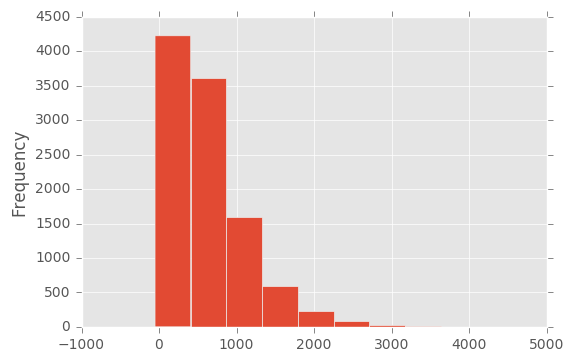

In [11]:
matches['t_first_kill'].plot(kind = 'hist')

# sen_log

In [12]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }

sen = pd.DataFrame(columns = [key for key, value in sen_cnt.items()])

for i in range(0, len(matches['sen_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }
    try: 
        if matches['sen_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['sen_log'][i])):
                for timeStamp in timeStamps:
                    if matches['sen_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_sen_cnt_" + timeStamp
                        sen_cnt[varName] += 1
            sen_cnt['id'] = matches['id'][i]
            senRow = pd.DataFrame.from_dict(sen_cnt, orient = 'index').transpose()
            sen = sen.append(senRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

In [13]:
matches = matches.merge(sen, left_on='id', right_on='id', how='inner')
matches.shape

(10404, 97)

# Возникают новые записи в таблице, хотя используется inner join. С чем это может быть связано?

# obs_log

In [17]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }

obs = pd.DataFrame(columns = [key for key, value in obs_cnt.items()])

for i in range(0, len(matches['obs_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }
    try: 
        if matches['obs_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['obs_log'][i])):
                for timeStamp in timeStamps:
                    if matches['obs_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_obs_cnt_" + timeStamp
                        obs_cnt[varName] += 1
            obs_cnt['id'] = matches['id'][i]
            obsRow = pd.DataFrame.from_dict(obs_cnt, orient = 'index').transpose()
            obs = obs.append(obsRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed
7000 Matches has been processed
8000 Matches has been processed
9000 Matches has been processed
10000 Matches has been processed


In [18]:
matches = matches.merge(obs, left_on='id', right_on='id', how='inner')
print matches.shape

(10428, 106)


# runes_log

In [19]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }

runes = pd.DataFrame(columns = [key for key, value in runes_cnt.items()])

for i in range(0, len(matches['runes_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }
    try:
        if matches['runes_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['runes_log'][i])):
                for timeStamp in timeStamps:
                    if matches['runes_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName = "t_runes_cnt_" + timeStamp
                        runes_cnt[varName] += 1
            runes_cnt['id'] = matches['id'][i]
            runesRow = pd.DataFrame.from_dict(runes_cnt, orient = 'index').transpose()
            runes = runes.append(runesRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed
7000 Matches has been processed
8000 Matches has been processed
9000 Matches has been processed
10000 Matches has been processed


In [20]:
matches = matches.merge(runes, left_on='id', right_on='id', how='inner')
matches.shape  

(10908, 115)

# buyback_log

In [21]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }

buyback = pd.DataFrame(columns = [key for key, value in buyback_cnt.items()])

for i in range(0, len(matches['buyback_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }
    try: 
        if matches['buyback_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['buyback_log'][i])):
                for timeStamp in timeStamps:
                    varName = "t_buyback_cnt_" + timeStamp
                    if matches['buyback_log'][i][j]['time'] < int(timeStamp) * 60:                    
                        buyback_cnt[varName] += 1
            buyback_cnt['id'] = matches['id'][i]
            buybackRow = pd.DataFrame.from_dict(buyback_cnt, orient = 'index').transpose()
            buyback = buyback.append(buybackRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed
7000 Matches has been processed
8000 Matches has been processed
9000 Matches has been processed
10000 Matches has been processed


In [22]:
matches = matches.merge(buyback, left_on='id', right_on='id', how='inner')
matches.shape

(141468, 124)

In [23]:
buyback.shape

(10908, 10)

# Откуда 4000 новых записей после Join, при условии, что таблица buyback содержит 10908 записей?

# Hero statistics

In [24]:
urlHeroes = "https://api.opendota.com/api/heroStats"

In [25]:
response = urllib2.urlopen(urlHeroes)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)

In [26]:
heroesList = list()
heroAttr = [
            'id',
            'localized_name', 
            'attack_type',
            'pro_ban', 
            'pro_pick', 
            'pro_win', 
            'primary_attr', 
            'roles'
            ]
heroRolesList = [
                'Carry',
                'Disabler',
                'Initiator',
                'Jungler',
                'Support',
                'Durable',
                'Nuker',
                'Escape',
                'Pusher'
                ]

for heroId in range(0, len(dictData) - 1):    
    heroRaw = dict()
    
    for heroRole in heroRolesList:
        heroRaw[heroRole] = 0
    for key, value in dictData[heroId].iteritems():
        if key in heroAttr:
            heroRaw[key] = dictData[heroId][key]
            if key == 'roles':
                for heroRole in dictData[heroId][key]:
                    heroRaw[heroRole] = 1
    del heroRaw['roles']                
    heroesList.append(heroRaw)

In [27]:
heroes = pd.DataFrame(heroesList)
print heroes.shape
heroes.head()

(112, 16)


,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type,id,localized_name,primary_attr,pro_ban,pro_pick,pro_win
0,1,0,0,1,0,0,1,0,0,Melee,1,Anti-Mage,agi,60.0,40.0,16.0
1,0,1,1,0,1,1,0,0,0,Melee,2,Axe,str,210.0,206.0,107.0
2,0,1,1,0,0,0,1,0,1,Ranged,3,Bane,int,1.0,19.0,10.0
3,1,1,0,0,1,1,1,0,0,Melee,4,Bloodseeker,agi,7.0,16.0,6.0
4,0,1,0,0,0,1,1,0,1,Ranged,5,Crystal Maiden,int,58.0,406.0,228.0


In [28]:
matches= matches.merge(heroes, left_on = 'hero_id', right_on = 'id', how = 'inner')
matches.shape

(141323, 140)

In [29]:
matches.head()

,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,88553213,16,Ranged,[],0.0,224,0.0,3,2983,4,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
1,106809101,8,Ranged,"[{u'slot': 8, u'type': u'buyback_log', u'playe...",0.0,138,0.0,5,2398,116,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
2,40547474,10,Ranged,[],2.0,224,4.0,0,1621,167,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
3,102525542,4,Ranged,[],0.0,156,0.0,12,2202,42,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
4,106809101,3,Ranged,[],2.0,186,7.0,2,1274,163,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0


In [30]:
matches.tail()

,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
141318,112377459,0,Ranged,[],0.0,153,0.0,3,999,160,...,1,0,1,Ranged,68,Ancient Apparition,int,15.0,11.0,3.0
141319,117990312,21,Ranged,"[{u'slot': 3, u'type': u'buyback_log', u'playe...",2.0,224,5.0,9,3396,143,...,1,0,1,Ranged,68,Ancient Apparition,int,15.0,11.0,3.0
141320,129585121,4,Ranged,[],0.0,224,0.0,1,2997,129,...,0,0,0,Ranged,59,Huskar,str,10.0,5.0,4.0
141321,101450083,6,Ranged,[],1.0,132,2.0,5,3149,251,...,0,0,0,Ranged,59,Huskar,str,10.0,5.0,4.0
141322,50828662,9,Ranged,[],0.0,123,0.0,6,1868,200,...,1,0,0,Ranged,105,Techies,int,NaN,NaN,NaN


In [47]:
for col in list(matches):
    print col

account_id
assists
attack_type_x
buyback_log
camps_stacked
cluster
creeps_stacked
deaths
duration
first_blood_time
gold_per_min
gold_spent
hero_damage
hero_healing
hero_id
kills_log
leagueid
leaguename
localized_name_x
match_id
obs_log
ping_log
player_slot
primary_attr_x
purchase_log
role_log
runes_log
sen_log
start_time
stuns
t_experience_cnt_10
t_experience_cnt_12
t_experience_cnt_15
t_experience_cnt_20
t_experience_cnt_25
t_experience_cnt_3
t_experience_cnt_30
t_experience_cnt_5
t_experience_cnt_8
t_gold_cnt_10
t_gold_cnt_12
t_gold_cnt_15
t_gold_cnt_20
t_gold_cnt_25
t_gold_cnt_3
t_gold_cnt_30
t_gold_cnt_5
t_gold_cnt_8
t_lasthits_cnt_10
t_lasthits_cnt_12
t_lasthits_cnt_15
t_lasthits_cnt_20
t_lasthits_cnt_25
t_lasthits_cnt_3
t_lasthits_cnt_30
t_lasthits_cnt_5
t_lasthits_cnt_8
team_id
tower_damage
win
xp_per_min
id_x
datetime
t_item_aether_lens
t_item_arcane_boots
t_item_black_king_bar
t_item_blade_mail
t_item_blink
t_item_boots
t_item_bottle
t_item_desolator
t_item_echo_sabre
t_item_f

# Заметка: после join появляются id_x и id_y - айдишники правых и левых таблиц

In [53]:
print matches['id_x'].unique().size

10253


In [54]:
print matches['id_y'].unique().size

112


# Используем id_x в качестве уникального id.
Аналог SQL select distinct id_x from matches (Удаляем дубликаты)

In [63]:
matches.drop_duplicates(subset = 'id_x', inplace = False)

,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,88553213,16,Ranged,[],0.0,224,0.0,3,2983,4,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
1,106809101,8,Ranged,"[{u'slot': 8, u'type': u'buyback_log', u'playe...",0.0,138,0.0,5,2398,116,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
2,40547474,10,Ranged,[],2.0,224,4.0,0,1621,167,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
3,102525542,4,Ranged,[],0.0,156,0.0,12,2202,42,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
4,106809101,3,Ranged,[],2.0,186,7.0,2,1274,163,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
5,106809101,8,Ranged,[],2.0,183,6.0,0,1581,144,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
6,102525542,13,Ranged,[],0.0,154,0.0,10,2535,7,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
7,91443418,17,Ranged,[],0.0,151,0.0,12,2744,146,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
8,88553213,15,Ranged,"[{u'slot': 9, u'type': u'buyback_log', u'playe...",1.0,224,3.0,7,3084,163,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
9,107803494,12,Ranged,"[{u'slot': 9, u'type': u'buyback_log', u'playe...",0.0,224,0.0,3,2983,4,...,1,0,0,Ranged,11,Shadow Fiend,agi,198.0,192.0,89.0


In [64]:
matches.shape

(10253, 140)

In [68]:
matchesWithoutLogs = matches.drop(labels = ['buyback_log', 'kills_log', 'obs_log', 'ping_log', 'purchase_log', 'role_log', 'runes_log', 'sen_log'], axis = 1)

In [70]:
matchesWithoutLogs.to_csv('StatsForMajor.csv', na_rep = 'NaN', sep = ';')